## Performance Clustering Using K-Means
### Introduction
In this lab, we explore student performance using K-Means clustering, an unsupervised machine learning technique. The goal is to group students based on their Study Hours per Week and Exam Score (%), identifying patterns that may help in understanding study behaviors and academic outcomes.

### Methodology
- Data Preprocessing:
   - Selected relevant features: Study_Hours_per_Week and Exam_Score (%).
   - Converted categorical variables into numerical form if necessary.

- K-Means Clustering:

    - Used the Elbow Method to determine the optimal number of clusters.
    - Applied K-Means with n_clusters=5.
    - Visualized clusters and their centroids.

In [2]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_curve,auc
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("student_performance_large_dataset.csv")

In [4]:
df.head()

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Student_ID                               10000 non-null  object
 1   Age                                      10000 non-null  int64 
 2   Gender                                   10000 non-null  object
 3   Study_Hours_per_Week                     10000 non-null  int64 
 4   Preferred_Learning_Style                 10000 non-null  object
 5   Online_Courses_Completed                 10000 non-null  int64 
 6   Participation_in_Discussions             10000 non-null  object
 7   Assignment_Completion_Rate (%)           10000 non-null  int64 
 8   Exam_Score (%)                           10000 non-null  int64 
 9   Attendance_Rate (%)                      10000 non-null  int64 
 10  Use_of_Educational_Tech                  10000 non-null  ob

In [6]:
X= df.iloc[:,[3,8]].values

[4805211.387000002]
[4805211.387000002, 2475617.053253079]
[4805211.387000002, 2475617.053253079, 1760599.7548375125]
[4805211.387000002, 2475617.053253079, 1760599.7548375125, 1203933.9868642227]
[4805211.387000002, 2475617.053253079, 1760599.7548375125, 1203933.9868642227, 951791.6105429395]
[4805211.387000002, 2475617.053253079, 1760599.7548375125, 1203933.9868642227, 951791.6105429395, 759044.5164717499]
[4805211.387000002, 2475617.053253079, 1760599.7548375125, 1203933.9868642227, 951791.6105429395, 759044.5164717499, 684976.5346360394]
[4805211.387000002, 2475617.053253079, 1760599.7548375125, 1203933.9868642227, 951791.6105429395, 759044.5164717499, 684976.5346360394, 611350.0236745394]
[4805211.387000002, 2475617.053253079, 1760599.7548375125, 1203933.9868642227, 951791.6105429395, 759044.5164717499, 684976.5346360394, 611350.0236745394, 538356.0415102675]
[4805211.387000002, 2475617.053253079, 1760599.7548375125, 1203933.9868642227, 951791.6105429395, 759044.5164717499, 684976

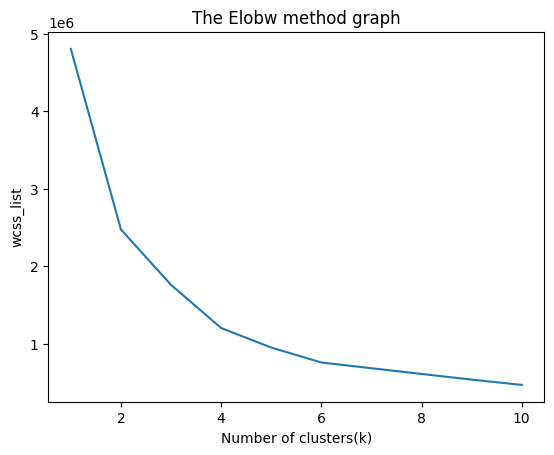

In [7]:
from sklearn.cluster import KMeans
wcss_list=[]
for i in range(1,11):
    kmeans =KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)
    print(wcss_list)
plt.plot(range(1,11),wcss_list)
plt.title("The Elobw method graph")
plt.xlabel("Number of clusters(k)")
plt.ylabel("wcss_list")
plt.show()

In [8]:
x=X

In [9]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(X)

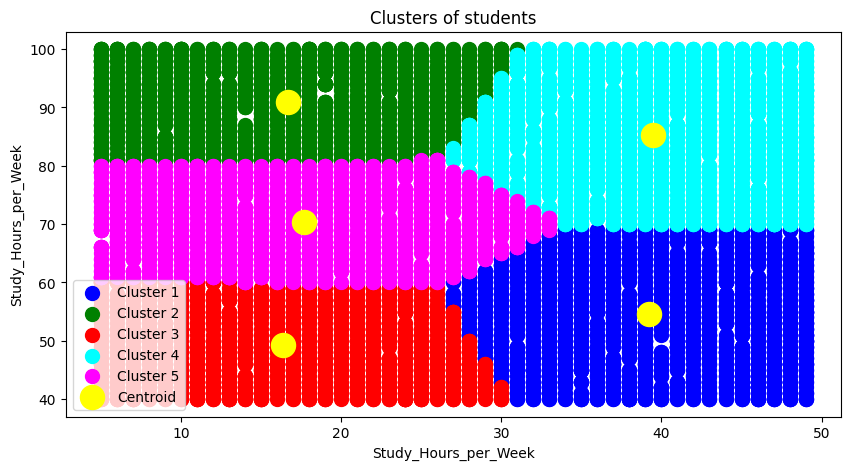

In [10]:
plt.figure(figsize=(10,5))

plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster

plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster

plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster

plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster

plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c="yellow",label="Centroid")
plt.title("Clusters of students")
plt.xlabel("Study_Hours_per_Week")
plt.ylabel("Study_Hours_per_Week")

plt.legend()
plt.show()


In [11]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X,y_predict)
print(f"Silhouetter score:{silhouette_avg:.2f}")

Silhouetter score:0.39


In [12]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(X)

## Conclusion
This analysis provides insights into student study behaviors and their correlation with exam performance. While clustering helps in identifying patterns, improving feature selection the results. 
Hence, This is how we have perfomed the clustering of Students study dataset Using Kmeans clustering technique.